In [1]:
!pip install memory_profiler
from keras import layers
from keras import models
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam
import keras.backend as K
import librosa
import librosa.display
import pylab
import matplotlib.pyplot as plt
from matplotlib import figure
%matplotlib inline
from memory_profiler import memory_usage
import pandas as pd
from glob import glob
import numpy as np
import os
import gc

     |████████████████████████████████| 40kB 3.2MB/s 
  Created wheel for memory-profiler: filename=memory_profiler-0.55.0-cp36-none-any.whl size=27174 sha256=87c204c783a3f8562cde465dce9c5984af513da3eae49af849e44e302511bf36
  Stored in directory: /root/.cache/pip/wheels/f0/ff/63/fdbff3f1e1b76ad4eae491dd5b190902906b093e93eb86dd5a
Successfully built memory-profiler


Using TensorFlow backend.


In [2]:
!wget http://download.tensorflow.org/data/speech_commands_v0.01.tar.gz

--2019-11-20 16:07:40--  http://download.tensorflow.org/data/speech_commands_v0.01.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.20.128, 2607:f8b0:400e:c07::80
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.20.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1489096277 (1.4G) [application/gzip]
Saving to: ‘speech_commands_v0.01.tar.gz’

speech_commands_v0. 100%[===================>]   1.39G  73.1MB/s    in 18s     

2019-11-20 16:07:58 (80.8 MB/s) - ‘speech_commands_v0.01.tar.gz’ saved [1489096277/1489096277]



In [0]:
def create_spectrogram(filepath,save_path):
  plt.interactive(False)
  clip,sample_rate=librosa.load(filepath,sr=None)
  fig=plt.figure(figsize=[0.72,0.72])
  ax=fig.add_subplot(111)
  ax.axes.get_xaxis().set_visible(False)
  ax.axes.get_yaxis().set_visible(False)
  ax.set_frame_on(False)
  S=librosa.feature.melspectrogram(y=clip,sr=sample_rate)
  librosa.display.specshow(librosa.power_to_db(S,ref=np.max))
  fig.savefig(save_path,dpi=400,bbox_inches='tight',pad_inches=0)
  plt.close()
  fig.clf()
  plt.close(fig)
  plt.close('all')
  del filepath,save_path,clip,sample_rate,fig,ax,S







In [5]:
!mkdir data
!tar -C /content/data -xvf /content/speech_commands_v0.01.tar.gz

./
./eight/
./eight/1b88bf70_nohash_0.wav
./eight/798f702a_nohash_2.wav
./eight/b12bef84_nohash_1.wav
./eight/05b2db80_nohash_1.wav
./eight/750e3e75_nohash_0.wav
./eight/3852fca2_nohash_0.wav
./eight/5ac04a92_nohash_0.wav
./eight/778a4a01_nohash_0.wav
./eight/61e50f62_nohash_0.wav
./eight/17c94b23_nohash_0.wav
./eight/037c445a_nohash_1.wav
./eight/11321027_nohash_0.wav
./eight/b97c9f77_nohash_1.wav
./eight/10467b06_nohash_1.wav
./eight/baf01c1f_nohash_0.wav
./eight/48bdc11c_nohash_0.wav
./eight/cb2929ce_nohash_4.wav
./eight/a6285644_nohash_2.wav
./eight/01b4757a_nohash_0.wav
./eight/ea1f888c_nohash_0.wav
./eight/a6285644_nohash_1.wav
./eight/88120683_nohash_0.wav
./eight/f44f440f_nohash_2.wav
./eight/1ecfb537_nohash_2.wav
./eight/7ff4fc72_nohash_0.wav
./eight/57b68383_nohash_2.wav
./eight/f0edc767_nohash_0.wav
./eight/50f55535_nohash_0.wav
./eight/cd7f8c1b_nohash_2.wav
./eight/98582fee_nohash_1.wav
./eight/b8872c20_nohash_0.wav
./eight/4a4e28f1_nohash_3.wav
./eight/9587481f_nohash_0.wa

In [6]:
!mkdir Imgs
%cd /content/Imgs
!mkdir train
!mkdir test
%cd /content/Imgs/train/
!mkdir yes
!mkdir no
%cd ../
%cd test
!mkdir yes
!mkdir no


/content/Imgs
/content/Imgs/train
/content/Imgs
/content/Imgs/test


In [7]:
%cd /content/
!mkdir yes
!mkdir no

/content


In [0]:
import shutil
#copying 20% files to yes_test.
yes_file_list=os.listdir('/content/data/yes/')
for filename in yes_file_list[0:int(0.2*len(yes_file_list))]:
 
  
  shutil.move('/content/data/yes/'+filename, '/content/yes/')

#copying 20% files to no_test.
no_file_list=os.listdir('/content/data/no/')
for filename in no_file_list[0:int(0.2*len(no_file_list))]:
  shutil.move('/content/data/no/'+filename, '/content/no/')





In [9]:
print(len(os.listdir('/content/yes/')))

475


In [10]:
#Generate training data
%load_ext memory_profiler 
%memit   #Emit memory

for label in ['yes','no']:
  for filename in os.listdir('/content/data/'+label+'/'):
    filepath='/content/data/'+label+'/'+filename
    real_name=filename.split('.')[0]
    savepath='/content/Imgs/train/'+label+'/'+real_name+'.jpg'
    create_spectrogram(filepath,savepath)

gc.collect()

%memit   #Emit memory

for label in ['yes','no']:
  for filename in os.listdir('/content/'+label+'/'):
    filepath='/content/'+label+'/'+filename
    real_name=filename.split('.')[0]
    savepath='/content/Imgs/test/'+label+'/'+real_name+'.jpg'
    create_spectrogram(filepath,savepath)

gc.collect()








peak memory: 422.34 MiB, increment: 0.01 MiB
peak memory: 467.07 MiB, increment: 0.00 MiB


39031

In [26]:
!ls /content/Imgs/test/yes/

004ae714_nohash_0.jpg  5a3712c9_nohash_0.jpg  afabfa0e_nohash_0.jpg
0132a06d_nohash_2.jpg  5c237956_nohash_0.jpg  b00dff7e_nohash_0.jpg
0132a06d_nohash_4.jpg  5c39594f_nohash_2.jpg  b0bad4a9_nohash_0.jpg
0137b3f4_nohash_1.jpg  5c39594f_nohash_3.jpg  b0bad4a9_nohash_2.jpg
01bb6a2a_nohash_0.jpg  5c8af87a_nohash_2.jpg  b25b6065_nohash_1.jpg
01bb6a2a_nohash_4.jpg  5eb5fc74_nohash_1.jpg  b2e2773a_nohash_0.jpg
01d22d03_nohash_1.jpg  5f47fdf9_nohash_0.jpg  b36c27c2_nohash_0.jpg
023a61ad_nohash_0.jpg  5f814c23_nohash_1.jpg  b433332a_nohash_0.jpg
035de8fe_nohash_0.jpg  5fe4a278_nohash_0.jpg  b49caed3_nohash_0.jpg
0685264e_nohash_0.jpg  6078eb0d_nohash_0.jpg  b49caed3_nohash_2.jpg
069ab0d5_nohash_0.jpg  617de221_nohash_4.jpg  b5552931_nohash_1.jpg
069ab0d5_nohash_1.jpg  61bcb275_nohash_1.jpg  b575b5fb_nohash_0.jpg
06a79a03_nohash_1.jpg  62581901_nohash_1.jpg  b5935410_nohash_0.jpg
0a9f9af7_nohash_0.jpg  62ef962d_nohash_2.jpg  b6ebe225_nohash_1.jpg
0ac15fe9_nohash_0.jpg  6301e683_nohash_0.jpg  b8

(217, 223, 3)


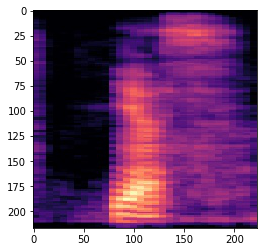

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('/content/Imgs/train/yes/57b38f48_nohash_0.jpg')
plt.imshow(img)
print(np.asarray(img).shape)

In [22]:
from keras.preprocessing.image import ImageDataGenerator
image_gen=ImageDataGenerator(rescale=1./255)
train_img_generator=image_gen.flow_from_directory('/content/Imgs/train/',target_size=(64,64),batch_size=32,class_mode='binary')
test_img_generator=image_gen.flow_from_directory('/content/Imgs/test/',target_size=(64,64),batch_size=32,class_mode='binary')

Found 3802 images belonging to 2 classes.
Found 950 images belonging to 2 classes.


In [0]:
from keras.models import Sequential
from keras.layers import Activation,Dropout,Flatten,Conv2D,MaxPooling2D,Dense

model=Sequential()
model.add(Conv2D(32,(3,3),padding='same',input_shape=(64,64,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.5))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=["accuracy"])








In [25]:
from keras.callbacks import EarlyStopping,ModelCheckpoint
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.0001) 
mc = ModelCheckpoint('best_model.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')
history=model.fit_generator(train_img_generator,steps_per_epoch=300,validation_data=test_img_generator,epochs=50,callbacks=[es,mc],shuffle=True)

Epoch 1/50
300/300 [==============================] - 14s 45ms/step - loss: 0.0535 - acc: 0.9817 - val_loss: 0.0737 - val_acc: 0.9758

Epoch 00001: val_acc improved from -inf to 0.97579, saving model to best_model.hdf5
Epoch 2/50
300/300 [==============================] - 13s 43ms/step - loss: 0.0513 - acc: 0.9802 - val_loss: 0.0563 - val_acc: 0.9779

Epoch 00002: val_acc improved from 0.97579 to 0.97789, saving model to best_model.hdf5
Epoch 3/50
300/300 [==============================] - 13s 44ms/step - loss: 0.0366 - acc: 0.9872 - val_loss: 0.0615 - val_acc: 0.9758

Epoch 00003: val_acc did not improve from 0.97789
Epoch 4/50
300/300 [==============================] - 13s 44ms/step - loss: 0.0305 - acc: 0.9895 - val_loss: 0.0922 - val_acc: 0.9789

Epoch 00004: val_acc improved from 0.97789 to 0.97895, saving model to best_model.hdf5
Epoch 5/50
300/300 [==============================] - 13s 44ms/step - loss: 0.0331 - acc: 0.9875 - val_loss: 0.0429 - val_acc: 0.9832

Epoch 00005: val_

In [29]:
train_img_generator.class_indices

{'no': 0, 'yes': 1}

In [34]:
from keras.models import load_model
import cv2
trained_model=load_model('/content/best_model.hdf5')
audio_img=cv2.imread('/content/Imgs/test/yes/36de13e1_nohash_0.jpg')
audio_img=cv2.cvtColor(audio_img,cv2.COLOR_BGR2RGB)
audio_img=cv2.resize(audio_img,(64,64))
audio_img=np.expand_dims(audio_img,axis=0)
print(model.predict(audio_img))

[[1.]]
